In [1]:
import pandas as pd 

In [2]:
bank_data=pd.read_csv(f'E:/RELEVEL/RELEVEL PYTHON/Relevel_EDA_casestudy_data_and_notebook/Relevel 28 Oct 2022/columns_description.csv')

In [3]:
bank_data.tail(10)

,Unnamed: 0,Table,Row,Description,Special
150,204,previous_application.csv,NAME_SELLER_INDUSTRY,The industry of the seller,NaN
151,205,previous_application.csv,CNT_PAYMENT,Term of previous credit at application of the ...,NaN
152,206,previous_application.csv,NAME_YIELD_GROUP,Grouped interest rate into small medium and hi...,grouped
153,207,previous_application.csv,PRODUCT_COMBINATION,Detailed product combination of the previous a...,NaN
154,208,previous_application.csv,DAYS_FIRST_DRAWING,Relative to application date of current applic...,time only relative to the application
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application
159,213,previous_application.csv,NFLAG_INSURED_ON_APPROVAL,Did the client requested insurance during the ...,NaN


STEPS IN EDA

> Data Wrangling

> Univariate analysis

> Bivariate/Multivariate Analysis

>Final Insights

__DATA WRANGLING__

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
plt.rcParams['figure.figsize']=(10,5)

In [7]:
credit_data = pd.read_csv(f'E:/RELEVEL/RELEVEL PYTHON/Relevel_EDA_casestudy_data_and_notebook/Relevel 28 Oct 2022/application_data.csv')

In [8]:
credit_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#checking shape of Data

credit_data.shape

(307511, 122)

In [10]:
credit_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
credit_data.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [12]:
null_percentage=credit_data.isnull().sum().sort_values(ascending=False)/len(credit_data) *100

In [13]:
null_percentage

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [14]:
type(null_percentage)

pandas.core.series.Series

In [15]:
null_percentage.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_AVG                  69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

__DATA CLEANING__

In [16]:
null_columns=credit_data.isnull().sum().sort_values(ascending=False)

In [17]:
null_columns

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [18]:
null_columns.values

array([214865, 214865, 214865, 213514, 213514, 213514, 210295, 210199,
       210199, 210199, 208642, 208642, 208642, 204488, 204488, 204488,
       202929, 182590, 182590, 182590, 179943, 179943, 179943, 173378,
       169682, 169682, 169682, 163891, 163891, 163891, 156341, 156061,
       156061, 156061, 154828, 154828, 154828, 154350, 154350, 154350,
       154297, 153020, 153020, 153020, 150007, 150007, 150007, 148431,
       145755,  96391,  60965,  41519,  41519,  41519,  41519,  41519,
        41519,   1292,   1021,   1021,   1021,   1021,    660,    278,
           12,      2,      1,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [19]:
null_columns.values > 0.45*len(credit_data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [20]:
null_columns[null_columns.values > 0.45*len(credit_data)]

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [21]:
null_columns=null_columns[null_columns.values > 0.45*len(credit_data)]
null_columns

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [22]:
print('There are {} null columns in the table'.format(len(null_columns)))

There are 49 null columns in the table


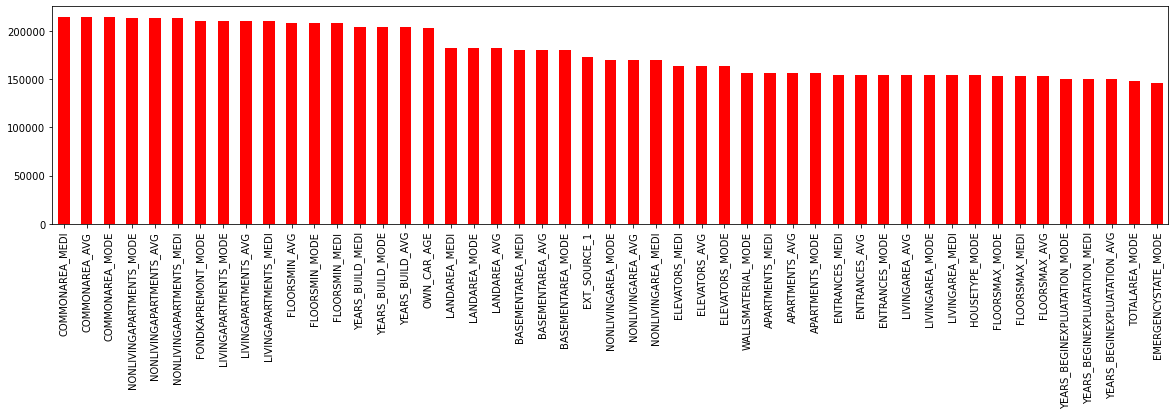

In [23]:
plt.figure(figsize=(20,4))
null_columns.plot(kind='bar',color='red')
plt.show()

In [24]:
def remove_null_columns(data):
    threshold_percent=0.45
    df=data.copy()
    removed_columns=df.isnull().sum()/len(df)
    #print(removed_columns)
    columns_to_be_removed=removed_columns[removed_columns.values>threshold_percent].index
    #print(columns_to_be_removed,len(columns_to_be_removed))
    df.drop(labels=columns_to_be_removed,axis=1,inplace=True)
    return df

In [25]:
new_credit_data=remove_null_columns(credit_data)

In [26]:
new_credit_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
new_credit_data.isnull().sum().sort_values(ascending=False)/len(new_credit_data) *100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

__IMPUTING MISSING DATA__

In [28]:
new_credit_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [29]:
new_credit_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [30]:
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
print(new_credit_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode())

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [31]:
columns_to_be_imputed=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']

In [32]:
new_credit_data_2=new_credit_data.copy() #copying the data for doing imputation

In [33]:
new_credit_data_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
for i in columns_to_be_imputed:
    new_credit_data_2[i]=new_credit_data[i].fillna(0)

In [35]:
new_credit_data_2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
for i in columns_to_be_imputed:
    print(new_credit_data_2[i].isnull().sum())

0
0
0
0
0
0


__USING BOXPLOTS TO DECIDE WHETHER TO USE MEAN, MEDIAN OR MODE FOR IMPUTATION__

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

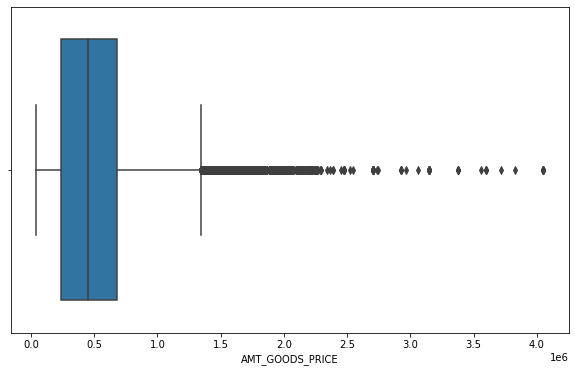

In [38]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(new_credit_data_2['AMT_GOODS_PRICE'])

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

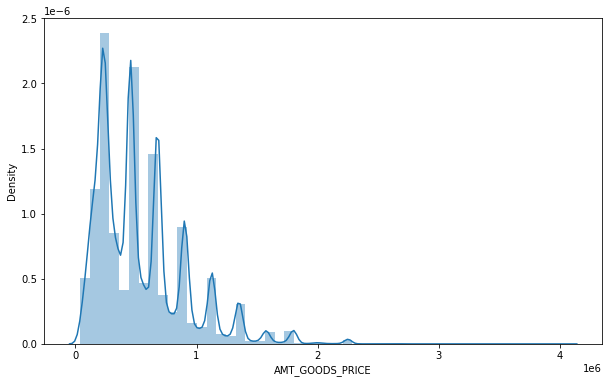

In [39]:
fig,ax=plt.subplots(figsize=(10,6))
sns.distplot(new_credit_data_2['AMT_GOODS_PRICE'])

FOR AMT_ANNUITY,AMT_GOODS_PRICE IN BOTH THE PLOTS WE HAVE FOUND THAT DATA IS RIGHT SKEWED THAT IS LONG TAIL ON RIGHT SO WE USE MEDIAN TO FILL
MISSING VALUES

__GOLDEN RULE FOR FILLING IN MISSING VALUES IN A NUMERICAL COLUMN/DF__

>If the column is normally distributed , then we fill the missing values by  __.mean()__ of that column

>If the column is not normally distributed , then we fill the missing values by __.median()__ of that column

__GOLDEN RULE FOR FILLING IN MISSING VALUES IN A CATEGORICAL COLUMN/DF__

>Fill with __mode()__,__ffill()__,__bfill()__,depending on the business scenario.

In [40]:
new_credit_data_2['AMT_ANNUITY'].median()

24903.0

In [41]:
new_credit_data_2['AMT_ANNUITY']=new_credit_data_2['AMT_ANNUITY'].fillna(new_credit_data_2['AMT_ANNUITY'].median())

In [42]:
new_credit_data_2['AMT_ANNUITY'].isna().sum()

0

In [43]:
new_credit_data_2['AMT_GOODS_PRICE']=new_credit_data_2['AMT_GOODS_PRICE'].fillna(new_credit_data_2['AMT_ANNUITY'].median())

In [44]:
new_credit_data_2['AMT_GOODS_PRICE'].isna().sum()

0

In [45]:
print(new_credit_data_2['DAYS_BIRTH'].unique())
print(new_credit_data_2['DAYS_EMPLOYED'].unique())
print(new_credit_data_2['DAYS_ID_PUBLISH'].unique())
print(new_credit_data_2['DAYS_LAST_PHONE_CHANGE'].unique())
print(new_credit_data_2['DAYS_REGISTRATION'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [46]:
negative_cols=[cols for cols in new_credit_data_2 if cols.startswith('DAYS')]

In [47]:
negative_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [48]:
for i in negative_cols:
    new_credit_data_2[i]=abs(new_credit_data_2[i])

In [49]:
new_credit_data_2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.379320e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.696017e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,2.490300e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [50]:
new_credit_data_2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [51]:
for i in new_credit_data_2['CODE_GENDER']:
    if i.strip()=='XNA':
        print('True')

True
True
True
True


In [52]:
new_credit_data_2.CODE_GENDER=='XNA','CODE_GENDER'

(0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 307506    False
 307507    False
 307508    False
 307509    False
 307510    False
 Name: CODE_GENDER, Length: 307511, dtype: bool,
 'CODE_GENDER')

In [53]:
new_credit_data_2.loc[new_credit_data_2.CODE_GENDER=='XNA','CODE_GENDER'] = 'F'

In [54]:
new_credit_data_2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [55]:
new_credit_data_2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [56]:
new_credit_data_2['ORGANIZATION_TYPE']=new_credit_data_2['ORGANIZATION_TYPE'].replace('XNA',np.NaN)

In [57]:
new_credit_data_2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

ADDING NEW COLUMNNS BY COMBINING EXISTING COLUMNS AS PER CONVENIENCE

In [58]:
new_credit_data_2['AMT_INCOME_RANGE']=pd.qcut(new_credit_data_2['AMT_INCOME_TOTAL'],
                                              q=[0,0.2,0.5,0.8,0.95,1],
                                             labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [59]:
new_credit_data_2['AMT_INCOME_RANGE'].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY_HIGH     14035
Name: AMT_INCOME_RANGE, dtype: int64

In [60]:
new_credit_data_2['AMT_CREDIT_RANGE']=pd.qcut(new_credit_data_2['AMT_CREDIT'],
                                              q=[0,0.2,0.5,0.8,0.95,1],
                                             labels=['VERY_LOW','LOW','MEDIUM','HIGH','VERY_HIGH'])

In [61]:
new_credit_data_2['AMT_CREDIT_RANGE'].value_counts()

MEDIUM       94750
LOW          88924
VERY_LOW     64925
HIGH         44878
VERY_HIGH    14034
Name: AMT_CREDIT_RANGE, dtype: int64

In [62]:
new_credit_data_2['DAYS_BIRTH'] #shows no of days a customer lived , we need to convert it into age

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [63]:
new_credit_data_2['DAYS_BIRTH']=(new_credit_data_2['DAYS_BIRTH']/365).astype(int)

In [64]:
new_credit_data_2['DAYS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307511, dtype: int32

In [65]:
new_credit_data_2['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [66]:
new_credit_data_2['AGE_GROUP']=pd.cut(new_credit_data_2['DAYS_BIRTH'],
                                              bins=[19,25,35,60,100],
                                             labels=['VERY_YOUNG','YOUNG','MIDDLE AGE','SENIOR CITIZEN'])

In [67]:
new_credit_data_2['AGE_GROUP'].value_counts()

MIDDLE AGE        185900
YOUNG              75925
SENIOR CITIZEN     29368
VERY_YOUNG         16318
Name: AGE_GROUP, dtype: int64

In [68]:
defaulter_data=new_credit_data_2[new_credit_data_2['TARGET']==1]
non_defaulter_data=new_credit_data_2[new_credit_data_2['TARGET']==0]

In [69]:
defaulter_data.shape

(24825, 76)

In [70]:
non_defaulter_data.shape

(282686, 76)

In [71]:
# Checking % of data split as per TARGET

print(" Defaulter data % - " + str(round(defaulter_data.shape[0]*100/new_credit_data_2.shape[0],2) ))
print(" Non-Defaulter data % - " + str(round(non_defaulter_data.shape[0]*100/new_credit_data_2.shape[0],2) ))

 Defaulter data % - 8.07
 Non-Defaulter data % - 91.93


# UNIVARIATE ANALYSIS

Univariate Analysis is simplest form of analysing data. It restricts the analysis to only 1 variable as the name states.
( Uni means One )

It doesn't take into account the mutual relationships and associations among variables. Rather it focuses on 
finding patterns through a particular field. 

In [72]:
new_credit_data_2['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

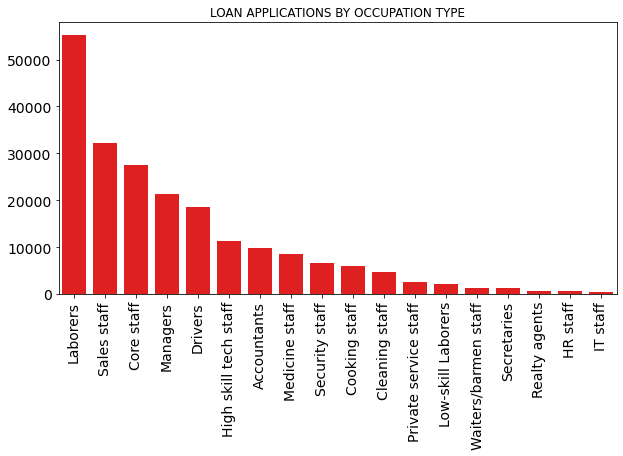

In [73]:
temp=new_credit_data_2['OCCUPATION_TYPE'].value_counts()
sns.barplot(x=temp.index,y=temp.values,color='red')
plt.xticks(rotation=90, size = 14)
plt.yticks( size = 14) 
plt.title('LOAN APPLICATIONS BY OCCUPATION TYPE')
plt.show()

We can conclude that most of the applications came from Laborers,Sales staff, Core staff

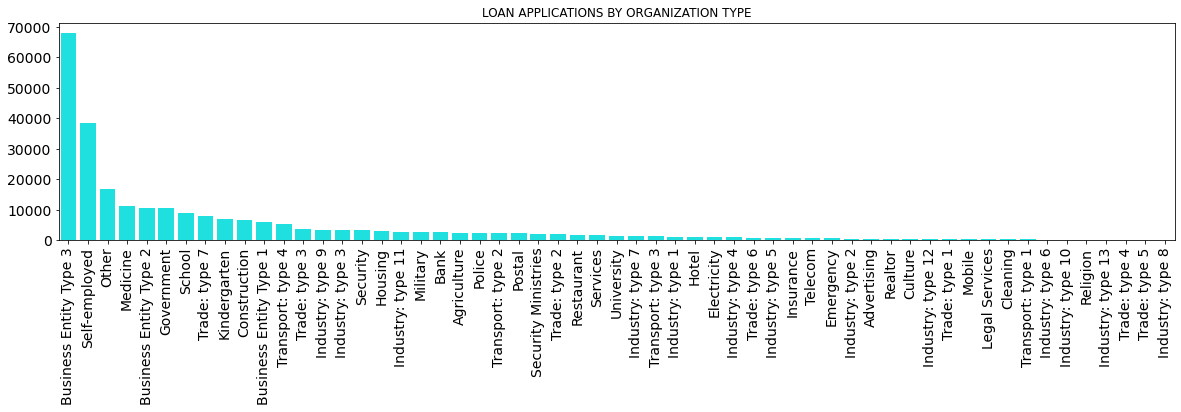

In [74]:
plt.figure(figsize=(20,4))
temp=new_credit_data_2['ORGANIZATION_TYPE'].value_counts()
sns.barplot(x=temp.index,y=temp.values,color='cyan')
plt.xticks(rotation=90, size = 14)
plt.yticks( size = 14) 
plt.title('LOAN APPLICATIONS BY ORGANIZATION TYPE')
plt.show()

We can see that Business Entity Type 3 and Self Employed constitute most number of applications

__Comparison of Gender Distribution between Defaulters and Non Defaulters__

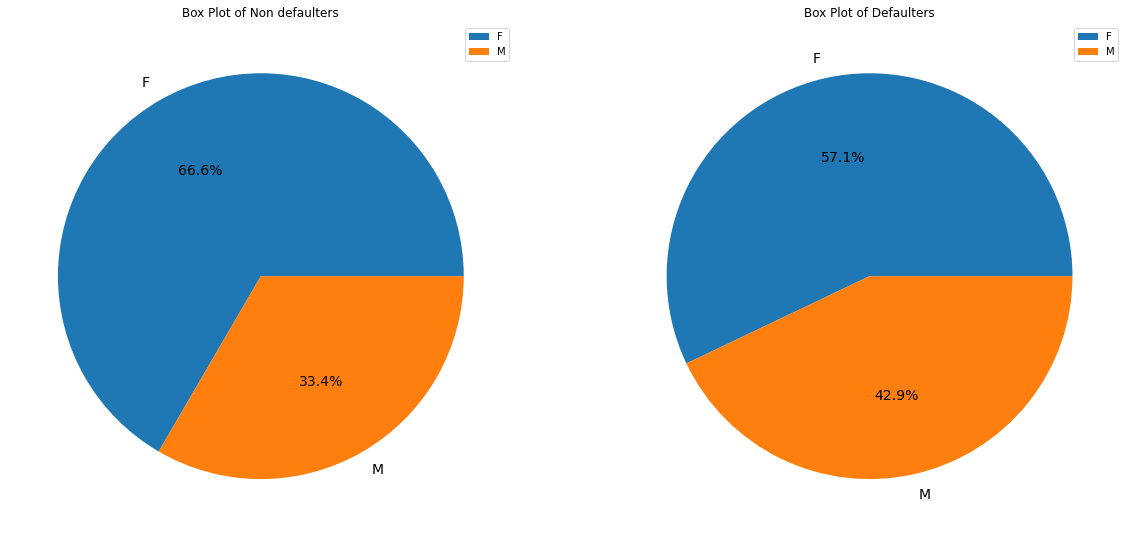

In [75]:
colors = sns.color_palette('tab10')[0:5]                   # Setting Color pallette for pie chart

fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,15))   # Defining Subplots and figure size. Keeping it wider for 2 chart
axes[0].set_title("Box Plot of Non defaulters")            # Setting title for Subplot 1
data = non_defaulter_data['CODE_GENDER'].value_counts()         # Data prep fot Subplot 1 ( Non Defaulter )
data_df = pd.DataFrame({'labels': data.index,'values': data.values})     
axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
axes[0].legend()




axes[1].set_title('Box Plot of Defaulters')
data=defaulter_data['CODE_GENDER'].value_counts()
data_df=pd.DataFrame({'labels':data.index,'values':data.values})
axes[1].pie(data_df['values'],labels=data_df['labels'],colors=colors,autopct='%0.1f%%',textprops={'fontsize':14})
axes[1].legend()

plt.show()

We can see that Females contribute to majority of applicants as shown in first pie-chart on left , where as Men tend to
Default on loans more as we can see the percentage rise on the second pie-chart.

__CONVERTING THE EARLIER CODE TO FUNCTION__

In [76]:
def univariate_comparison(col,hue=None):
    colors = sns.color_palette('tab10')[0:5]                   # Setting Color pallette for pie chart
    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,15))   # Defining Subplots and figure size. Keeping it wider for 2 chart
    axes[0].set_title("Box Plot of Non defaulters")            # Setting title for Subplot 1
    data = non_defaulter_data[col].value_counts()         # Data prep fot Subplot 1 ( Non Defaulter )
    data_df = pd.DataFrame({'labels': data.index,'values': data.values})     
    axes[0].pie(data_df['values'], labels = data_df['labels'], colors = colors, autopct='%0.1f%%',textprops={'fontsize': 14})
    axes[0].set_title('Applicants by  '+col, size=18,color = '#291038')
    axes[0].legend()




    axes[1].set_title('Box Plot of Defaulters')
    data=defaulter_data[col].value_counts()
    data_df=pd.DataFrame({'labels':data.index,'values':data.values})
    axes[1].pie(data_df['values'],labels=data_df['labels'],colors=colors,autopct='%0.1f%%',textprops={'fontsize':14})
    axes[1].set_title('Defaulters by  '+col, size=18,color = '#291038')
    axes[1].legend()

    plt.show()
    

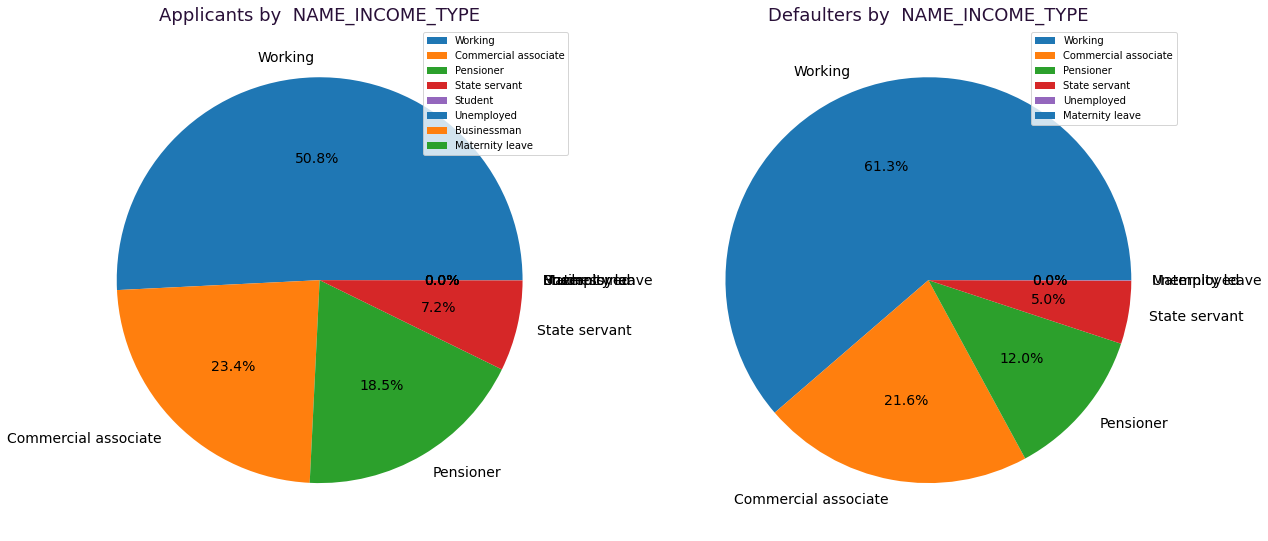

In [77]:
univariate_comparison('NAME_INCOME_TYPE')

We can see that Working professionals contribute to more % of applicants and They also contribute to higher amount of
Loan Defaults

On a positive side Pensioners , State servant tend to be low on defaults

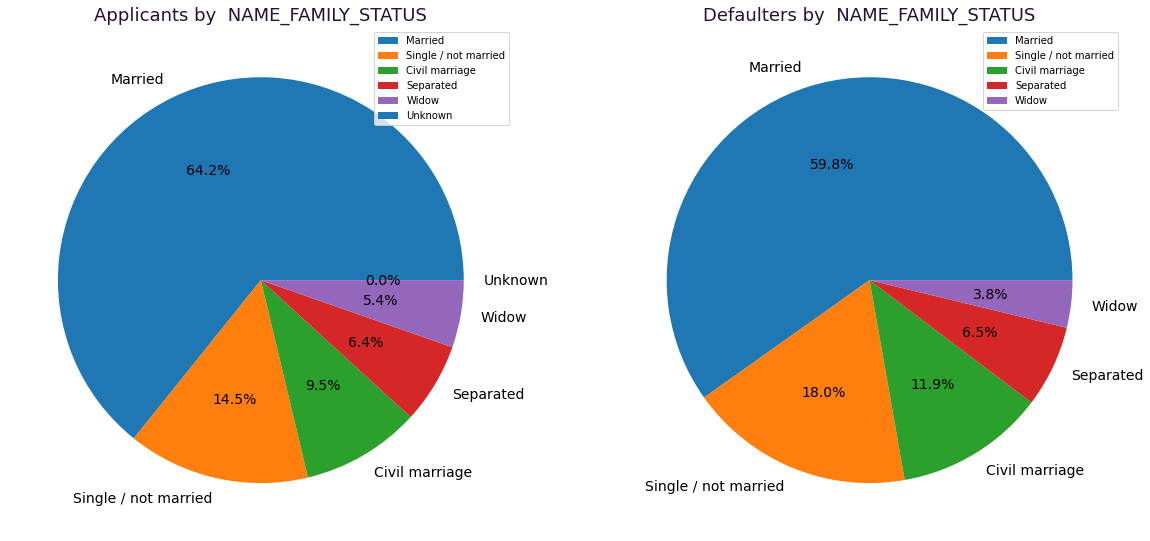

In [78]:
univariate_comparison('NAME_FAMILY_STATUS')

Married people tend to contribute to more number of loan applicants and 
Since we see a decrease in defaulter percentage we can conclude that family stats does not have a big impact on loan defaults 

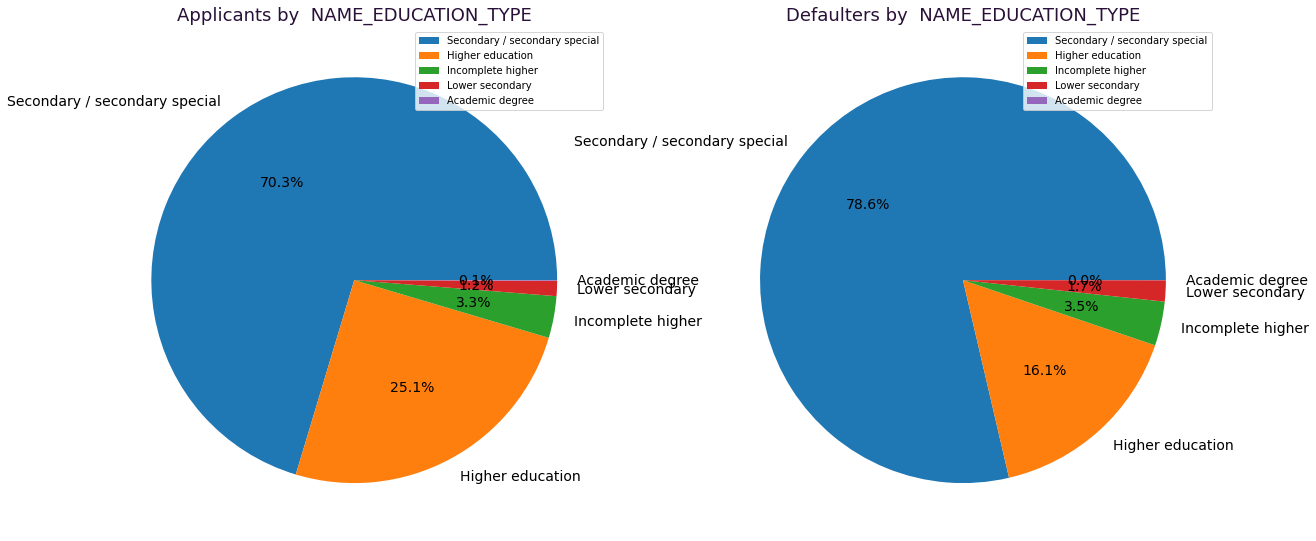

In [79]:
univariate_comparison('NAME_EDUCATION_TYPE')

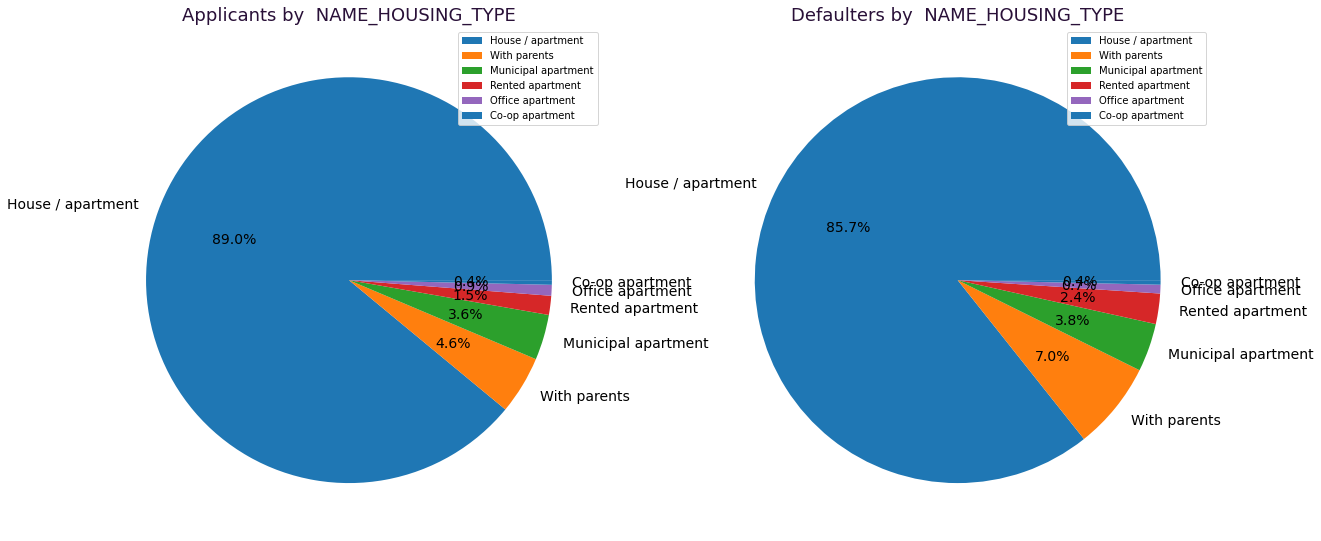

In [80]:
univariate_comparison('NAME_HOUSING_TYPE')

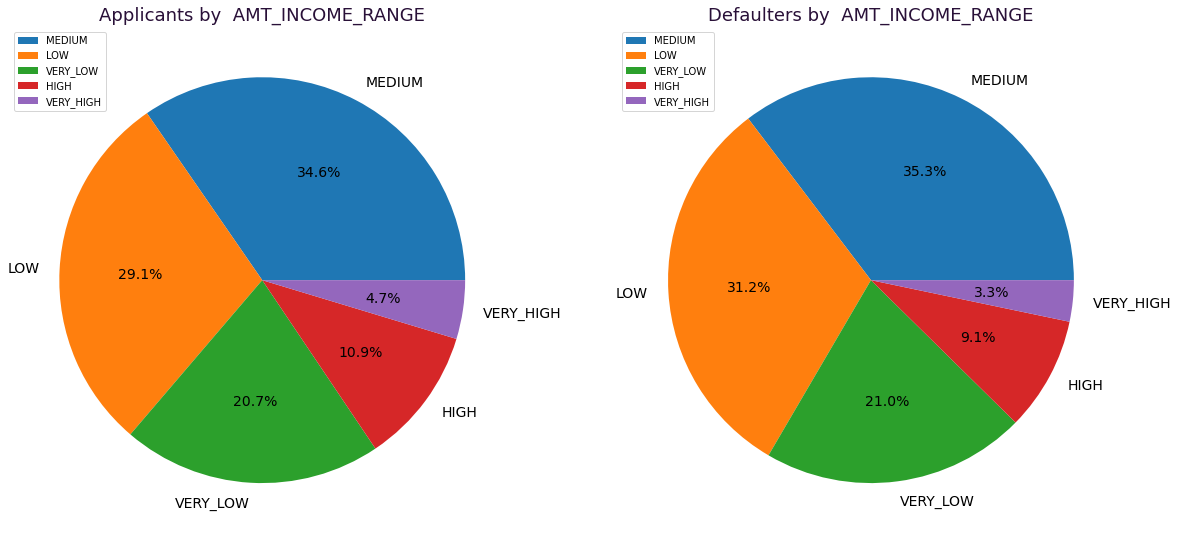

In [81]:
univariate_comparison('AMT_INCOME_RANGE')

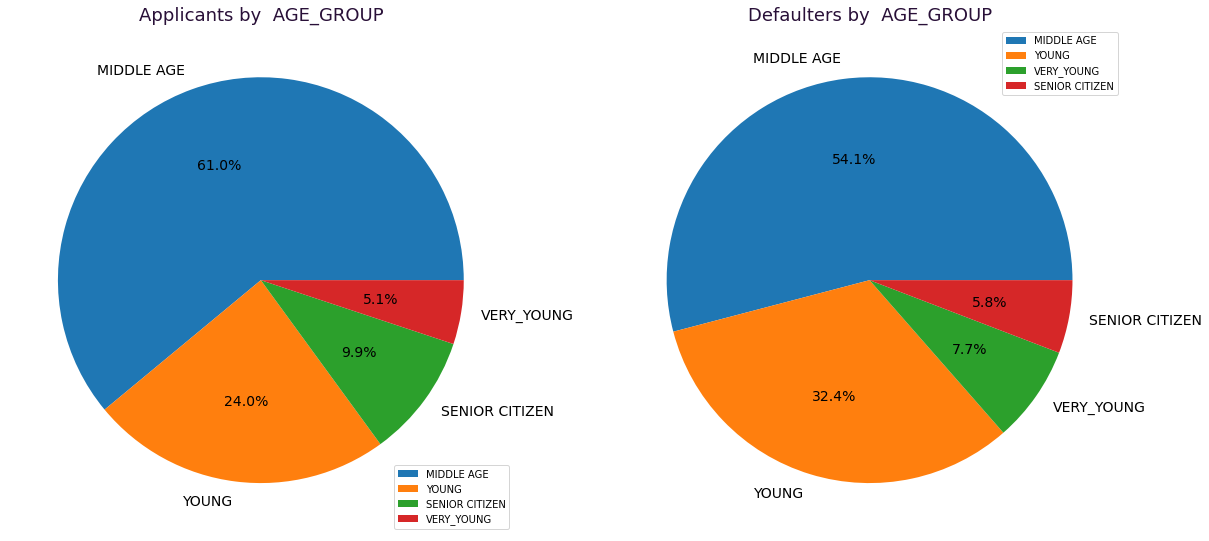

In [82]:
univariate_comparison('AGE_GROUP')

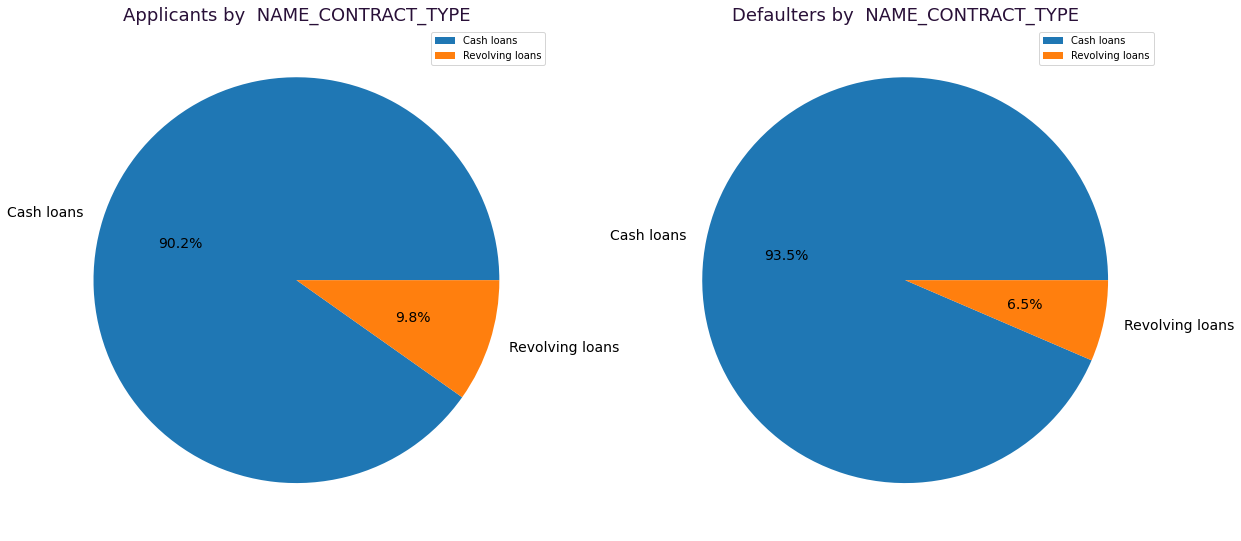

In [83]:
univariate_comparison('NAME_CONTRACT_TYPE')

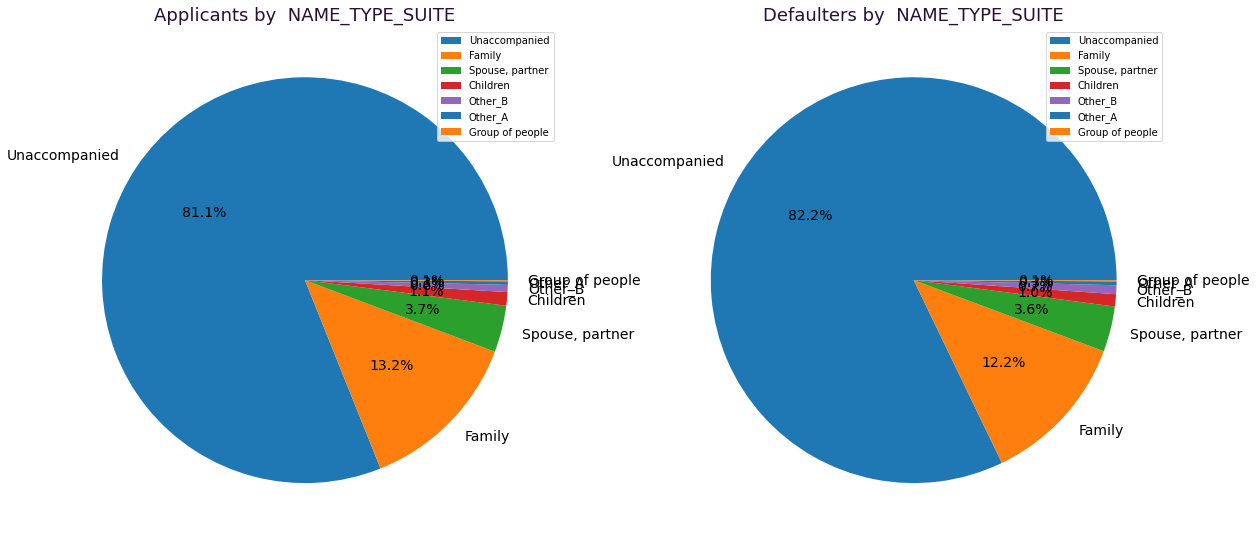

In [84]:
univariate_comparison('NAME_TYPE_SUITE')

# Univariate Analysis of Quantitative Variables

In [85]:
def univariate_comparison_quant(col,hue=None):

    fig, axes=plt.subplots(nrows =2,ncols=2,figsize=(20,12))                      # Defining 4 subplots, changing fig size
    axes[0,0].set_title("Displot (Non-Defaulter) for  " + col )                   # Chart titl for Subplot 1
    sns.distplot(non_defaulter_data[~non_defaulter_data[col].isna()][col],ax=axes[0,0], color="#4CB391") # Distplot in subplot 1


    axes[0,1].set_title("Displot (Defaulter) for  " + col )                       #  Title for Subplot 2
    sns.distplot(defaulter_data[~defaulter_data[col].isna()][col],ax=axes[0,1], color="#4CB391") # Displot in Subplot 2
    
    axes[1,0].set_title("Boxplot (Non-Defaulter) for  " + col )                   # Title for Subplot 3
    sns.boxplot(non_defaulter_data[~non_defaulter_data[col].isna()][col],ax=axes[1,0], color="#4CB391") # Boxplot in subplot 3

    axes[1,1].set_title("Boxplot (Defaulter) for  " + col )                       # Title for Subplot 4
    sns.boxplot(defaulter_data[~defaulter_data[col].isna()][col],ax=axes[1,1], orient='h',color="#4CB391") # Boxplot in Subplot 4

    plt.tight_layout()

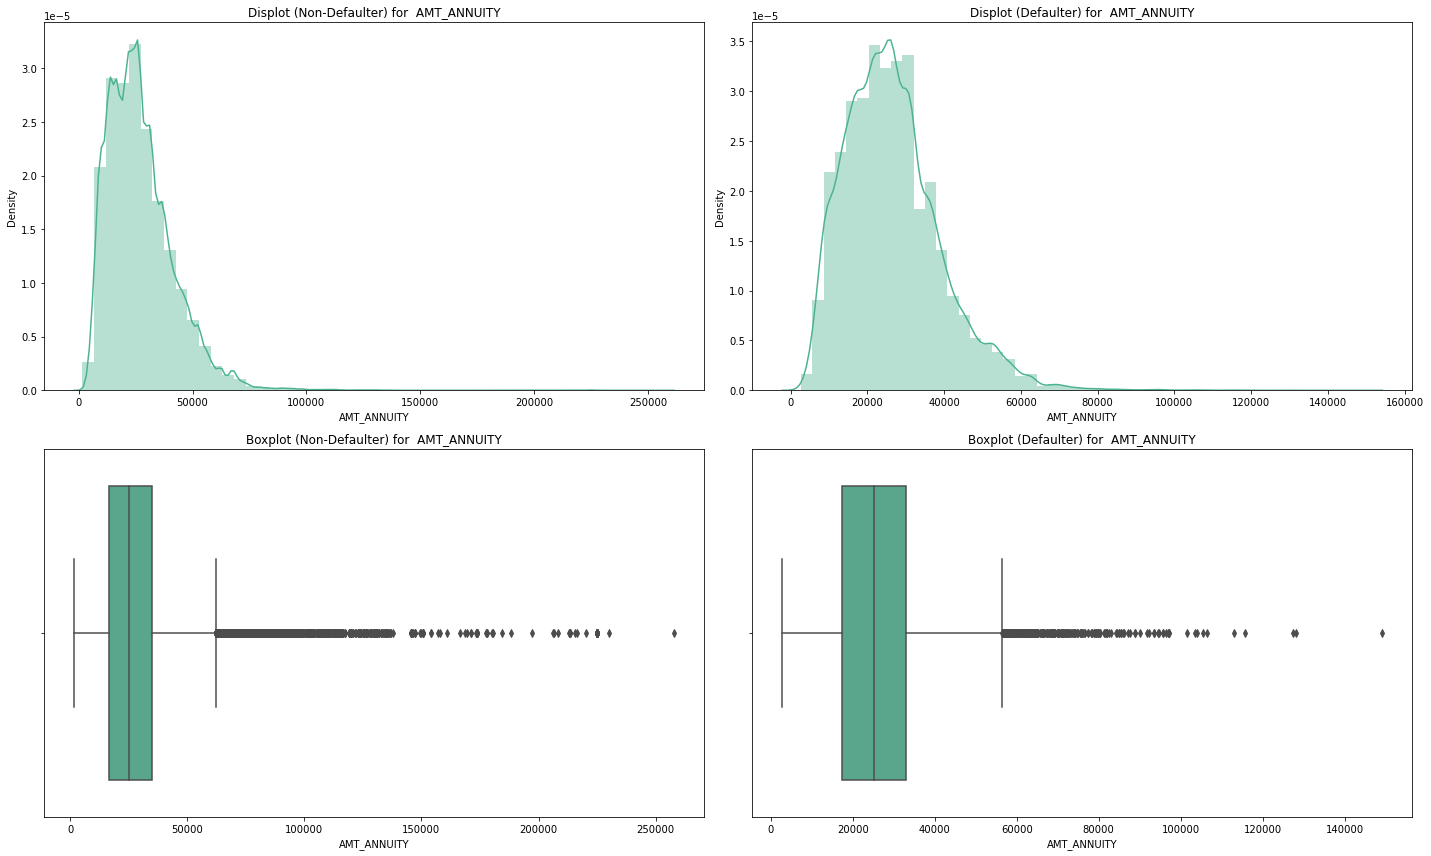

In [86]:
univariate_comparison_quant('AMT_ANNUITY')

We can infer that Low amount applicants tend to default more
The majority of Loan applicants came from first quartile of Data

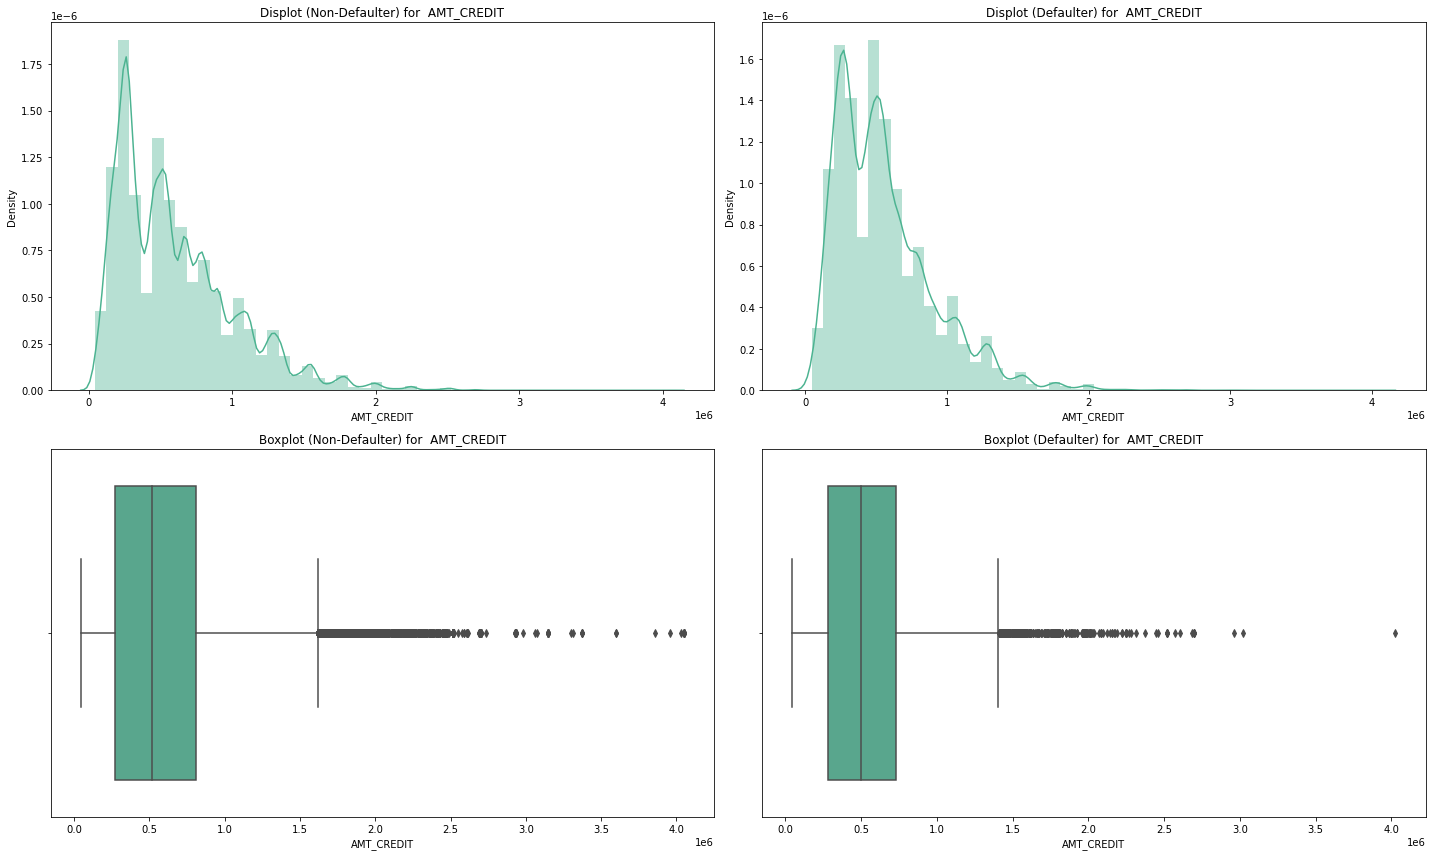

In [87]:
univariate_comparison_quant('AMT_CREDIT')

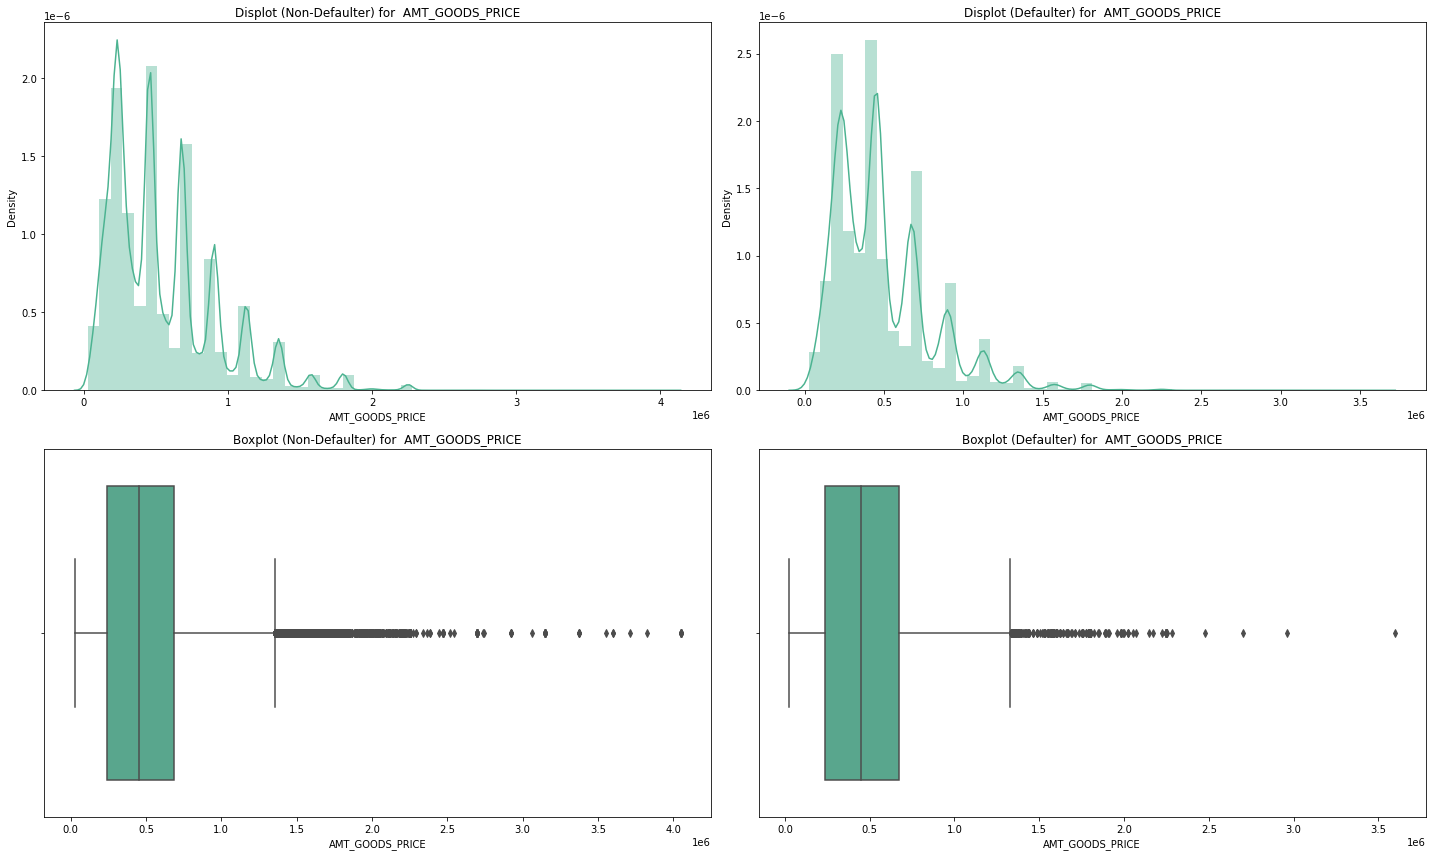

In [88]:
univariate_comparison_quant('AMT_GOODS_PRICE')

# Bivariate/Multivariate analysis

In [89]:
# Function for Multivariate analysis

def multivariate(col1,col2,col3=None):                                            # Takes 3 columns as inputs

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,12))               
    
    axes[0].set_title("Boxplot (Non-Defaulter) for  "  )
    _=sns.boxplot(data=non_defaulter_data,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[0])
#     _=axes[0].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Non-Defaulter)', size=15,color = 'blue')

    axes[1].set_title("Boxplot (Defaulter) for  "  )
    _=sns.boxplot(data=defaulter_data,x=col1, y=col2,palette = 'rainbow', hue= col3,ax=axes[1])
#     _=axes[1].set_title('Loan Amount by  ' + col2 + ' & ' + col3 + ' (Defaulter)', size=15,color = 'blue')


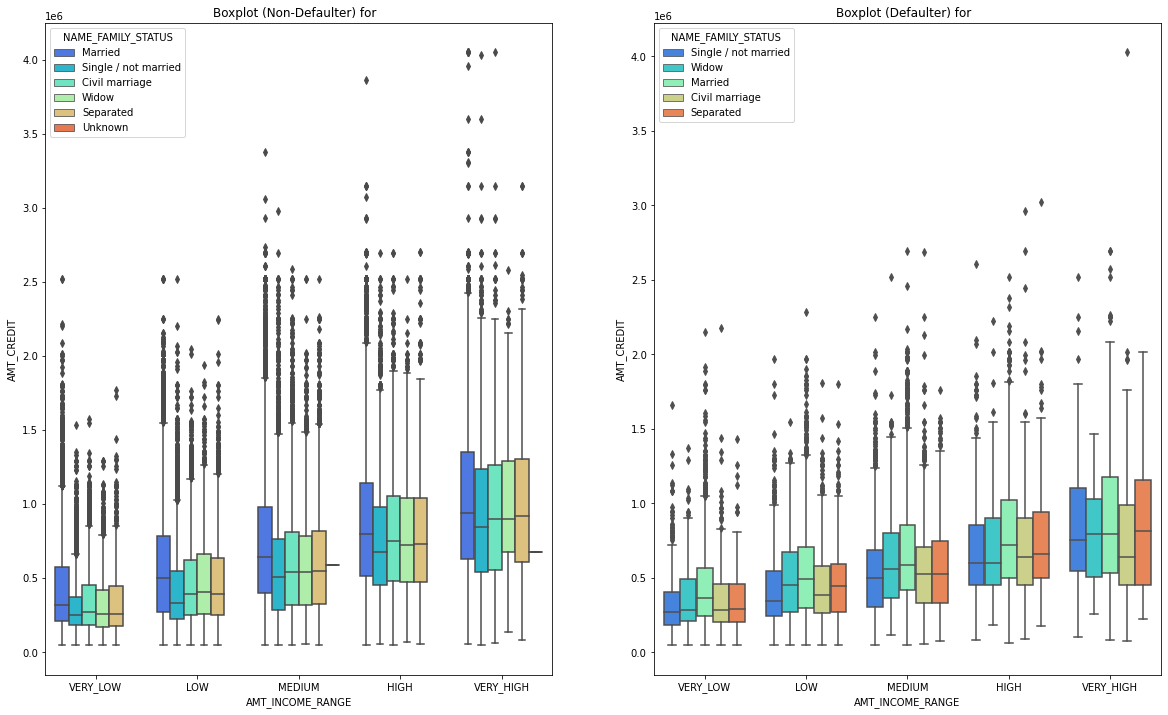

In [90]:
multivariate('AMT_INCOME_RANGE','AMT_CREDIT','NAME_FAMILY_STATUS')

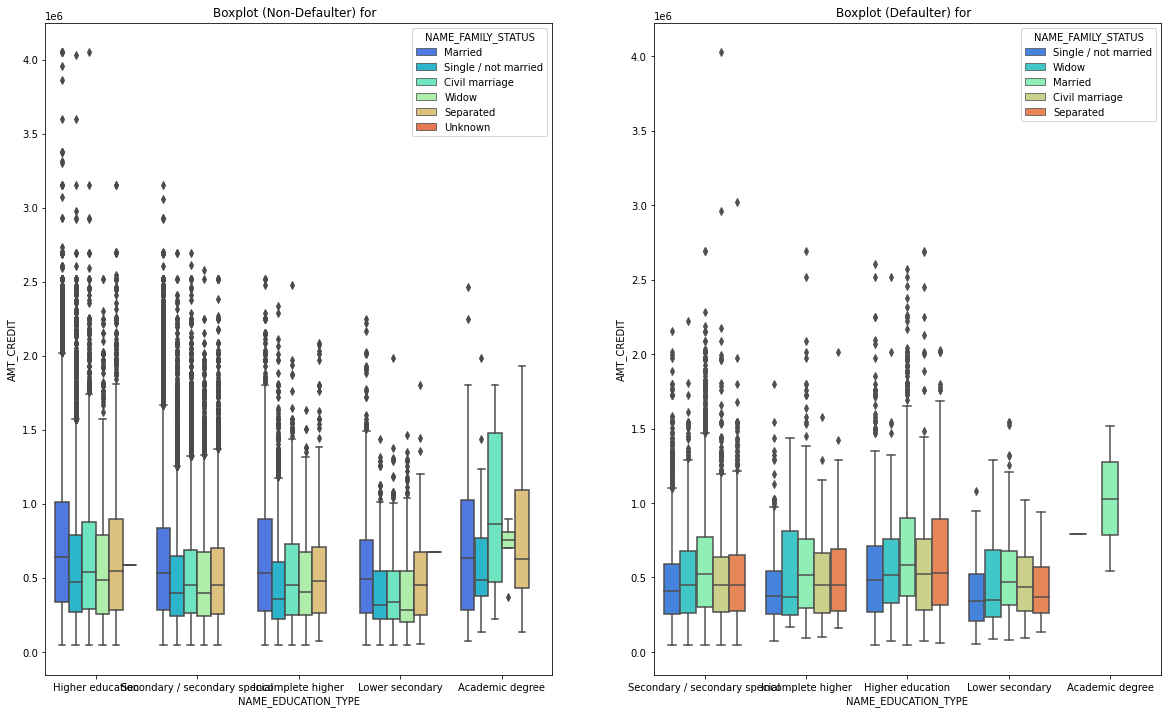

In [91]:
multivariate('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

# DRILL DOWN ANALYSIS

In [92]:
# Defining function for drilldown analysis

def perc_defaulters(col):

    fig, axes=plt.subplots(nrows =1,ncols=2,figsize=(20,10))
    
    total = new_credit_data_2[[col,'TARGET']].groupby(col).count()
    defaulter_1 = defaulter_data[[col,'TARGET']].groupby(col).count()
    perc = defaulter_1*100/total
    
    axes[0].set_title("Application Counts by  "+ col  )
    _=sns.barplot(x=total.index,y=total.TARGET,color='grey',order=total.sort_values('TARGET',ascending=False).index,ax=axes[0])
    _=axes[0].set_xticklabels(total.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')

    axes[1].set_title("Defaulter % by " + col  )
    _=sns.barplot(x=perc.index,y=perc.TARGET,color='#ff597d',order=perc.sort_values('TARGET',ascending=False).index,ax=axes[1])
    _=axes[1].set_xticklabels(perc.sort_values('TARGET',ascending=False).index,rotation=60, ha='right')


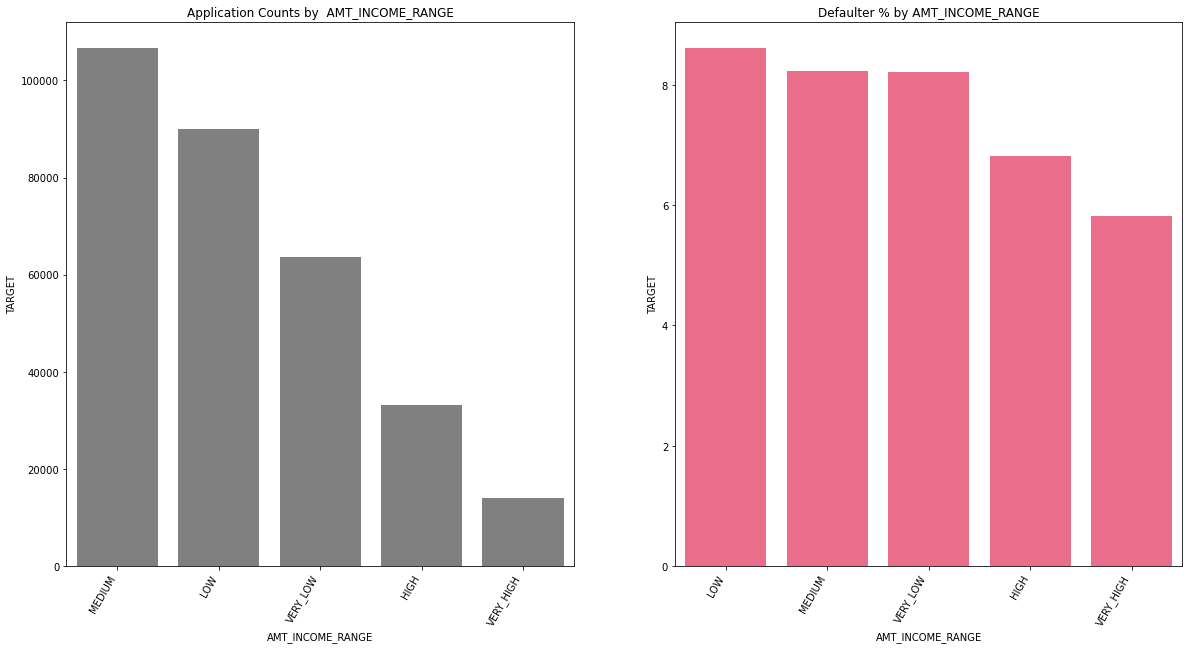

In [93]:
perc_defaulters('AMT_INCOME_RANGE')

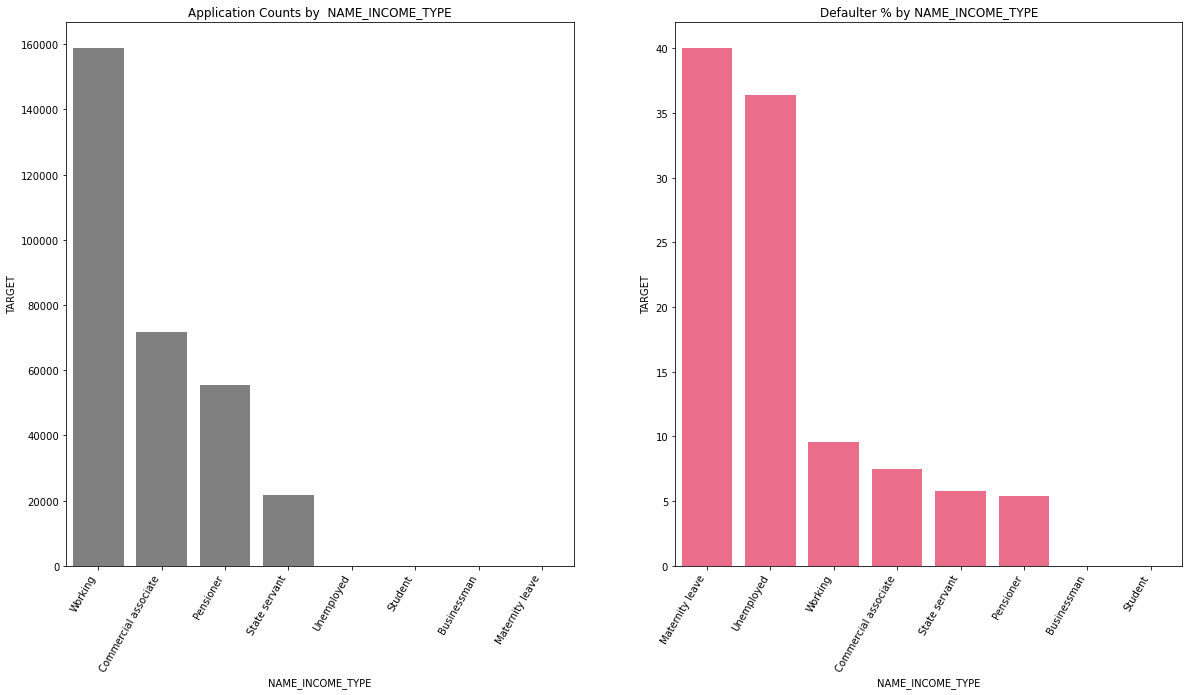

In [94]:
perc_defaulters('NAME_INCOME_TYPE')

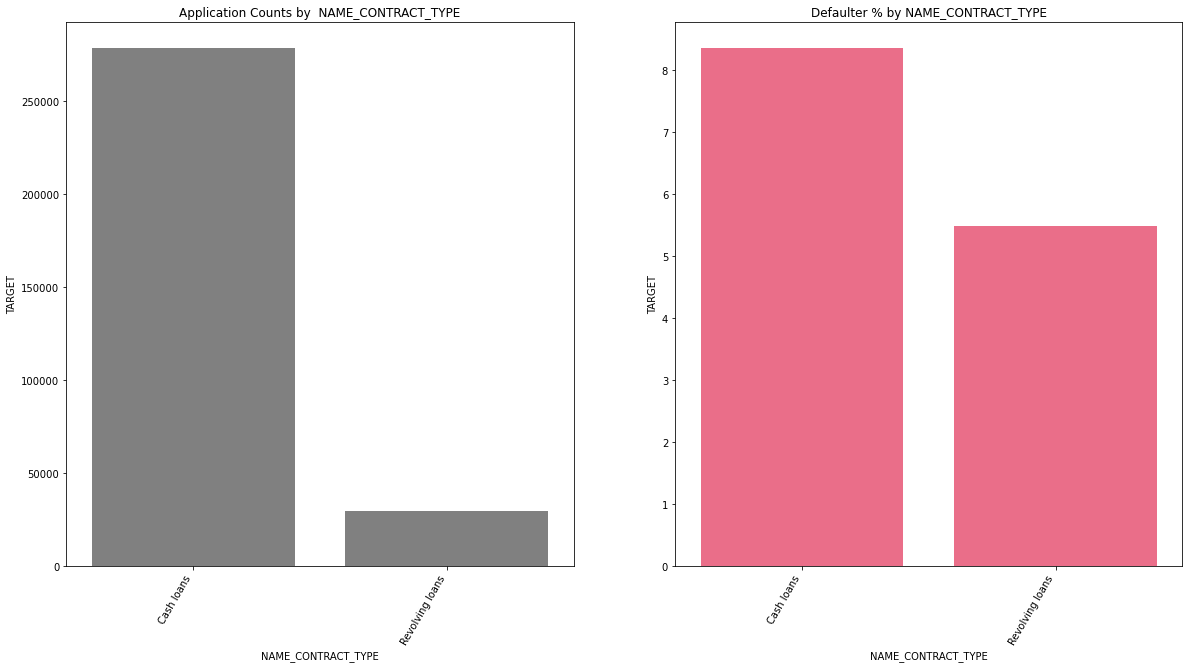

In [95]:
perc_defaulters('NAME_CONTRACT_TYPE')

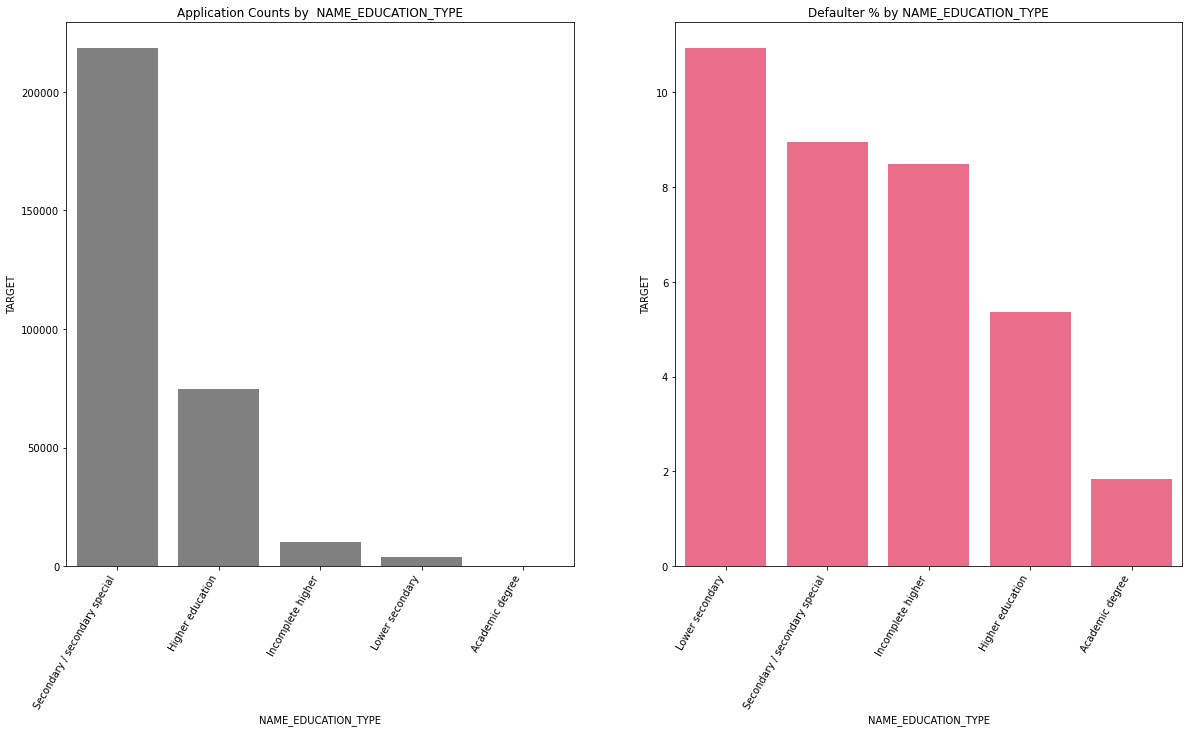

In [96]:
perc_defaulters('NAME_EDUCATION_TYPE')

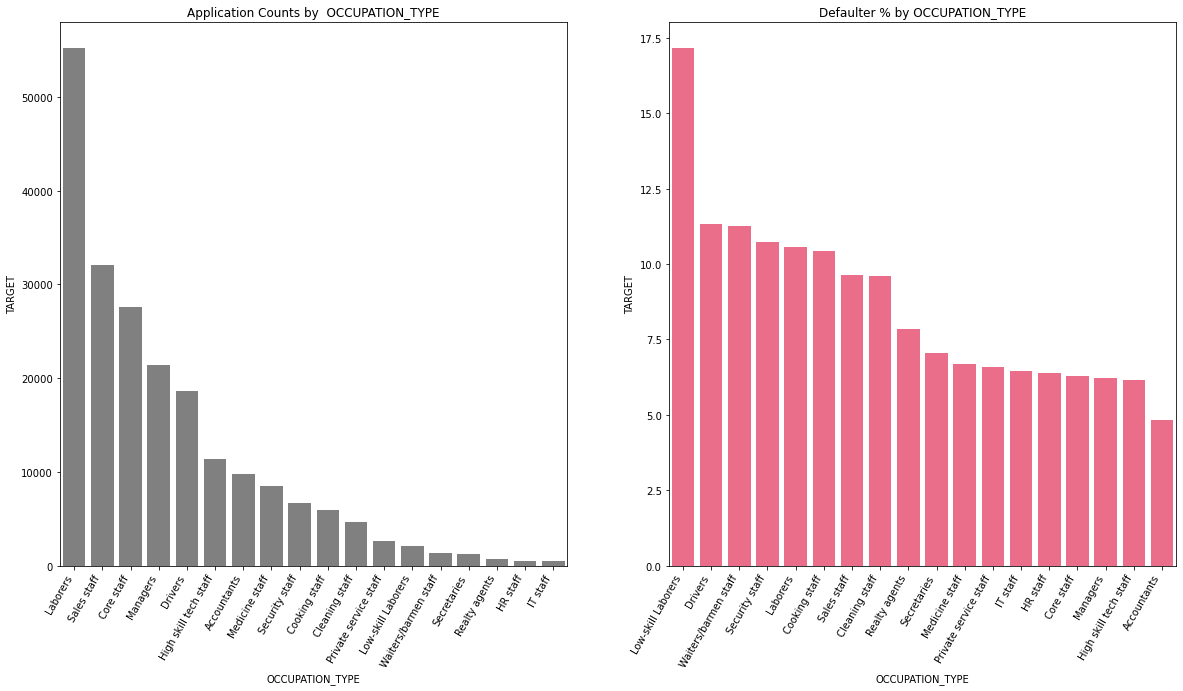

In [97]:
perc_defaulters('OCCUPATION_TYPE')

# PIVOT TABLE OF ALL LOAN DEFAULT PERCENTAGES

In [100]:
perc_defaulters=pd.pivot_table(
    new_credit_data_2,values='TARGET',
    index=['CODE_GENDER','AMT_INCOME_RANGE'],
    columns=['NAME_EDUCATION_TYPE'],aggfunc=np.mean
    
    
)

In [101]:
perc_defaulters

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          0.056068   
            LOW                      0.000000          0.049022   
            MEDIUM                   0.000000          0.050254   
            HIGH                     0.105263          0.041516   
            VERY_HIGH                0.076923          0.037289   
M           VERY_LOW                 0.000000          0.080411   
            LOW                      0.000000          0.073305   
            MEDIUM                   0.000000          0.070086   
            HIGH                     0.000000          0.055911   
            VERY_HIGH                0.000000          0.044080   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   0.086399         0.080193   
            LOW                        0.080075         0.113889   
            MEDIUM                     0.078431         0.096983   
            HIGH                       0.074313         0.038961   
            VERY_HIGH                  0.082251         0.066667   
M           VERY_LOW                   0.123967         0.125000   
            LOW                        0.097778         0.142857   
            MEDIUM                     0.095130         0.150515   
            HIGH                       0.074627         0.081633   
            VERY_HIGH                  0.077586         0.064516   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               0.076778  
            LOW                                    0.079523  
            MEDIUM                                 0.075692  
            HIGH                                   0.070736  
            VERY_HIGH                              0.065930  
M           VERY_LOW                               0.118066  
            LOW                                    0.123693  
            MEDIUM                                 0.113466  
            HIGH                                   0.093484  
            VERY_HIGH                              0.089939

# Bivariate Analysis using Pairplot

In [104]:
pairplot_data=new_credit_data_2[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','DAYS_BIRTH','TARGET']].fillna(0)

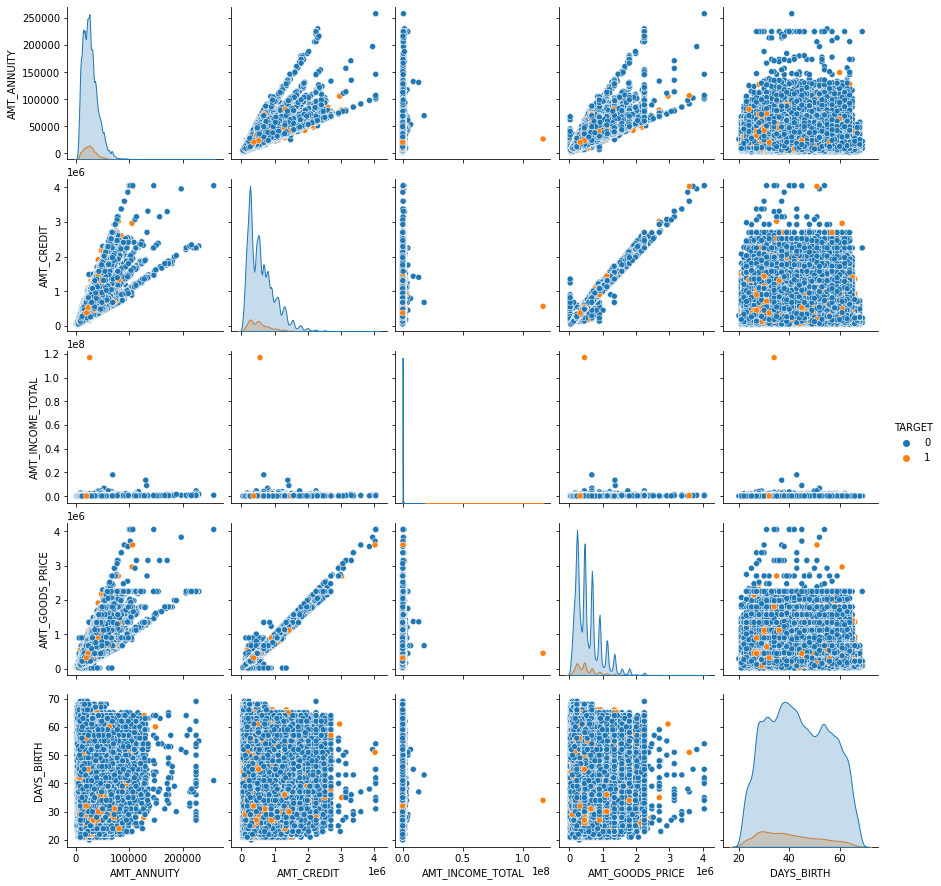

In [106]:
sns.pairplot(pairplot_data,hue='TARGET',diag_kind='kde')

array([[<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_ANNUITY'>,
        <AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_ANNUITY'>,
        <AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_ANNUITY'>,
        <AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_ANNUITY'>,
        <AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_ANNUITY'>,
        <AxesSubplot:xlabel='TARGET', ylabel='AMT_ANNUITY'>],
       [<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>,
        <AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_CREDIT'>,
        <AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>,
        <AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>,
        <AxesSubplot:xlabel='DAYS_BIRTH', ylabel='AMT_CREDIT'>,
        <AxesSubplot:xlabel='TARGET', ylabel='AMT_CREDIT'>],
       [<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_INCOME_TOTAL'>,
        <AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>,
        <AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_INCOME_

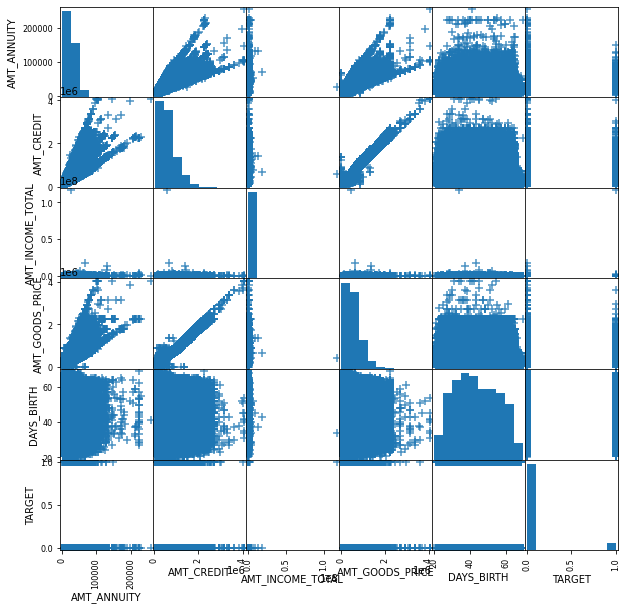

In [107]:
pd.plotting.scatter_matrix(pairplot_data,figsize=(10,10),marker='+',hist_kwds={'bins':10},s=60,alpha=0.8)

In [108]:
pairplot_data

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH,TARGET
0,24700.5,406597.5,202500.0,351000.0,25,1
1,35698.5,1293502.5,270000.0,1129500.0,45,0
2,6750.0,135000.0,67500.0,135000.0,52,0
3,29686.5,312682.5,135000.0,297000.0,52,0
4,21865.5,513000.0,121500.0,513000.0,54,0
...,...,...,...,...,...,...
307506,27558.0,254700.0,157500.0,225000.0,25,0
307507,12001.5,269550.0,72000.0,225000.0,56,0
307508,29979.0,677664.0,153000.0,585000.0,41,0
307509,20205.0,370107.0,171000.0,319500.0,32,1


In [109]:
heatmap_data=new_credit_data_2[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY',
                                'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                               'AMT_CREDIT']].corr(method='pearson')

<AxesSubplot:>

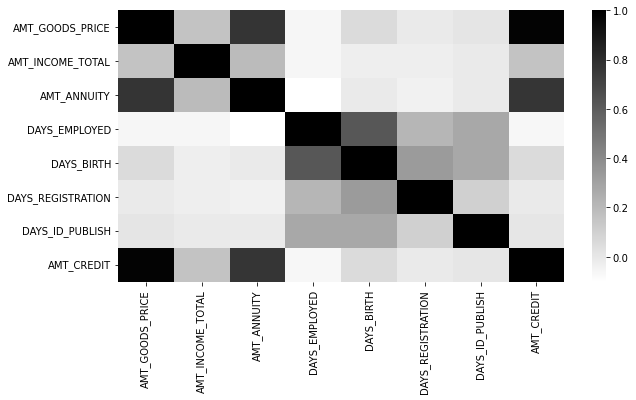

In [118]:
sns.heatmap(heatmap_data,cmap='binary')

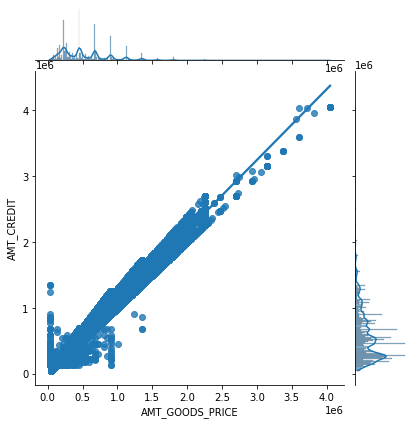

In [119]:
sns.jointplot(new_credit_data_2['AMT_GOODS_PRICE'],new_credit_data_2['AMT_CREDIT'],kind='reg')

In [121]:
# Preparing data for getting top 10 correlation combinations 

corr_matrix=defaulter_data[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')                     # Getting Correaltion Matrix

corr_matrix

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.037645,0.752893,0.006729,0.135329,0.025563,0.056060,0.982895
AMT_INCOME_TOTAL,0.037645,1.000000,0.046421,-0.014977,-0.003154,-0.000158,0.004215,0.038131
AMT_ANNUITY,0.752893,0.046421,1.000000,-0.081207,0.014028,-0.034279,0.016767,0.752195
DAYS_EMPLOYED,0.006729,-0.014977,-0.081207,1.000000,0.582441,0.192455,0.229090,0.001930
DAYS_BIRTH,0.135329,-0.003154,0.014028,0.582441,1.000000,0.289116,0.252256,0.135070
DAYS_REGISTRATION,0.025563,-0.000158,-0.034279,0.192455,0.289116,1.000000,0.096833,0.025854
DAYS_ID_PUBLISH,0.056060,0.004215,0.016767,0.229090,0.252256,0.096833,1.000000,0.052329
AMT_CREDIT,0.982895,0.038131,0.752195,0.001930,0.135070,0.025854,0.052329,1.000000


In [123]:
corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,NaN,0.037645,0.752893,0.006729,0.135329,0.025563,0.056060,0.982895
AMT_INCOME_TOTAL,NaN,NaN,0.046421,-0.014977,-0.003154,-0.000158,0.004215,0.038131
AMT_ANNUITY,NaN,NaN,NaN,-0.081207,0.014028,-0.034279,0.016767,0.752195
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,0.582441,0.192455,0.229090,0.001930
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,0.289116,0.252256,0.135070
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,0.096833,0.025854
DAYS_ID_PUBLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052329
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
corr_matrix=corr_matrix.unstack().reset_index()

In [126]:
corr_matrix

,level_0,level_1,0
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037645
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.752893
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,0.006729
4,AMT_GOODS_PRICE,DAYS_BIRTH,0.135329
...,...,...,...
59,AMT_CREDIT,DAYS_EMPLOYED,0.001930
60,AMT_CREDIT,DAYS_BIRTH,0.135070
61,AMT_CREDIT,DAYS_REGISTRATION,0.025854
62,AMT_CREDIT,DAYS_ID_PUBLISH,0.052329


In [127]:
corr_matrix.columns = ['Variable 1','Variable 2','Correlation'] 

In [128]:
corr_matrix

,Variable 1,Variable 2,Correlation
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000
1,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037645
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.752893
3,AMT_GOODS_PRICE,DAYS_EMPLOYED,0.006729
4,AMT_GOODS_PRICE,DAYS_BIRTH,0.135329
...,...,...,...
59,AMT_CREDIT,DAYS_EMPLOYED,0.001930
60,AMT_CREDIT,DAYS_BIRTH,0.135070
61,AMT_CREDIT,DAYS_REGISTRATION,0.025854
62,AMT_CREDIT,DAYS_ID_PUBLISH,0.052329


In [131]:
corr_matrix.sort_values('Correlation',ascending=False).head(20)

,Variable 1,Variable 2,Correlation
0,AMT_GOODS_PRICE,AMT_GOODS_PRICE,1.000000
9,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,1.000000
54,DAYS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000
45,DAYS_REGISTRATION,DAYS_REGISTRATION,1.000000
36,DAYS_BIRTH,DAYS_BIRTH,1.000000
27,DAYS_EMPLOYED,DAYS_EMPLOYED,1.000000
18,AMT_ANNUITY,AMT_ANNUITY,1.000000
63,AMT_CREDIT,AMT_CREDIT,1.000000
56,AMT_CREDIT,AMT_GOODS_PRICE,0.982895
7,AMT_GOODS_PRICE,AMT_CREDIT,0.982895
